In [1]:
real_data=pd.read_csv('./data/spambase.data', header=None)

In [2]:
real_data.drop(real_data.columns[57], axis=1, inplace=True)

In [3]:
real_data=np.array(real_data)

In [4]:
k=2
d=real_data.shape[1]

In [5]:
res_plus = kmeans(real_data,kmeansplusplus(real_data,k,d),k, d)

NameError: name 'real_data' is not defined

In [31]:
import matplotlib
my_cmap = matplotlib.cm.get_cmap('jet')
my_cmap.set_under('w')

In [27]:
import kmeans_combined_revised, simulatedData, time
from kmeans_combined_revised import kmeansplusplus, kmeansparallel, kmeans
from simulatedData import generate_data

In [9]:
# test on simulated data
# set number of clusters
k=4
# set variance for simulation
R = 100
# set dimensions
d=2
# generate data
sim_data = generate_data(k,R,d)

In [10]:
sim_plus = kmeans(sim_data,kmeansplusplus(sim_data,k,d), k, d)

In [11]:
x = sim_plus[0][:,0]
y = sim_plus[0][:,1]
labels = sim_plus[1]

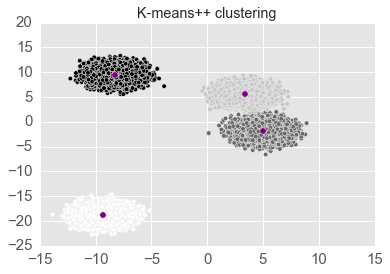

In [41]:
plt.figure()
plt.scatter(sim_data[:,0], sim_data[:,1], c=labels)
plt.scatter(x, y, s=40, marker="o", c="purple")
plt.title("K-means++ clustering")
pass

In [8]:
r = 2
for round in range(r):
    print(round)

0
1


In [ ]:
# set oversampling factor
l=k/2